# Optimizer Example
MNIST CNN example showing comparison between *newer* optimizers that appeared *after* Adam.. This is a classification problem.

Richard Henry, 15-Jul-2024 

Adapted from Keras Documentation. https://keras.io/examples/vision/mnist_convnet/

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|CNN|Modern|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
num_epochs = 32

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core(mShape,mClass):
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=mShape),
            tf.keras.layers.Conv2D(32, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(64, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(mClass, 
                                  activation="softmax"),
        ]
    )
    return model    
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model=model_core(myShap,myClas)
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:")
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    print("\n")
    print("Evaluate Model:")
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    print("Timing:")
    return myHis

### First Model, Adam

In [7]:
%%time
h0=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7675 - loss: 0.7617 - val_accuracy: 0.9790 - val_loss: 0.0765
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9645 - loss: 0.1198 - val_accuracy: 0.9845 - val_loss: 0.0549
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9722 - loss: 0.0874 - val_accuracy: 0.9877 - val_loss: 0.0436
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9777 - loss: 0.0706 - val_accuracy: 0.9888 - val_loss: 0.0443
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9797 - loss: 0.0628 - val_accuracy: 0.9900 - val_loss: 0.0368
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9822 - loss: 0.0548 - val_accuracy: 0.9893 - val_loss: 0.0373
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9833 - loss: 0.0515 - val_accuracy: 0.9895 - val_loss: 0.0378
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9857 - loss: 0.

### Second Model, Adam + Weight Decay

In [8]:
%%time
h1=model_build('adamw',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7782 - loss: 0.7377 - val_accuracy: 0.9758 - val_loss: 0.0859
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9617 - loss: 0.1269 - val_accuracy: 0.9847 - val_loss: 0.0553
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9732 - loss: 0.0890 - val_accuracy: 0.9877 - val_loss: 0.0454
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9771 - loss: 0.0731 - val_accuracy: 0.9895 - val_loss: 0.0414
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9805 - loss: 0.0636 - val_accuracy: 0.9883 - val_loss: 0.0446
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9823 - loss: 0.0563 - val_accuracy: 0.9900 - val_loss: 0.0384
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9829 - loss: 0.0524 - val_accuracy: 0.9910 - val_loss: 0.0337
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9853 - loss: 0.

### Third Model, AdaFactor

In [9]:
%%time
h2=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2866 - loss: 2.1690 - val_accuracy: 0.8290 - val_loss: 1.3522
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6727 - loss: 1.2051 - val_accuracy: 0.9058 - val_loss: 0.4803
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8056 - loss: 0.6318 - val_accuracy: 0.9308 - val_loss: 0.2841
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8658 - loss: 0.4403 - val_accuracy: 0.9458 - val_loss: 0.2104
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8952 - loss: 0.3441 - val_accuracy: 0.9552 - val_loss: 0.1713
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9094 - loss: 0.2924 - val_accuracy: 0.9612 - val_loss: 0.1482
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9242 - loss: 0.2533 - val_accuracy: 0.9645 - val_loss: 0.1323
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9309 - loss: 0.

### 4th Model, LION

In [10]:
%%time
h3=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7903 - loss: 0.6817 - val_accuracy: 0.9850 - val_loss: 0.0568
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9712 - loss: 0.0951 - val_accuracy: 0.9875 - val_loss: 0.0456
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9783 - loss: 0.0722 - val_accuracy: 0.9893 - val_loss: 0.0393
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9801 - loss: 0.0622 - val_accuracy: 0.9897 - val_loss: 0.0375
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9822 - loss: 0.0585 - val_accuracy: 0.9887 - val_loss: 0.0385
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9831 - loss: 0.0549 - val_accuracy: 0.9882 - val_loss: 0.0443
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9830 - loss: 0.0565 - val_accuracy: 0.9885 - val_loss: 0.0391
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9839 - loss: 0.

### 5th Model, Adam with Nesterov Momentum

In [11]:
%%time
h4=model_build('nadam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7630 - loss: 0.7623 - val_accuracy: 0.9758 - val_loss: 0.0839
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9631 - loss: 0.1207 - val_accuracy: 0.9832 - val_loss: 0.0581
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9746 - loss: 0.0851 - val_accuracy: 0.9862 - val_loss: 0.0478
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9785 - loss: 0.0722 - val_accuracy: 0.9887 - val_loss: 0.0408
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9795 - loss: 0.0643 - val_accuracy: 0.9900 - val_loss: 0.0363
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9819 - loss: 0.0561 - val_accuracy: 0.9905 - val_loss: 0.0352
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9834 - loss: 0.0529 - val_accuracy: 0.9908 - val_loss: 0.0342
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9844 - loss: 0.

### 6th Model, Follow the Regularized Leader

In [12]:
%%time
h5=model_build('ftrl',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.1130 - loss: 2.3027 - val_accuracy: 0.1050 - val_loss: 2.3024
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1155 - loss: 2.3023 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1155 - loss: 2.3022 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1155 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1155 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1155 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1155 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1155 - loss: 2.

### 7th Model, AdaMax

In [13]:
%%time
h6=model_build('adamax',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7004 - loss: 1.0208 - val_accuracy: 0.9627 - val_loss: 0.1413
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9342 - loss: 0.2157 - val_accuracy: 0.9748 - val_loss: 0.0987
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9533 - loss: 0.1531 - val_accuracy: 0.9780 - val_loss: 0.0823
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9599 - loss: 0.1304 - val_accuracy: 0.9813 - val_loss: 0.0707
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9664 - loss: 0.1101 - val_accuracy: 0.9842 - val_loss: 0.0630
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9706 - loss: 0.0974 - val_accuracy: 0.9838 - val_loss: 0.0580
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9722 - loss: 0.0920 - val_accuracy: 0.9862 - val_loss: 0.0543
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9742 - loss: 0.

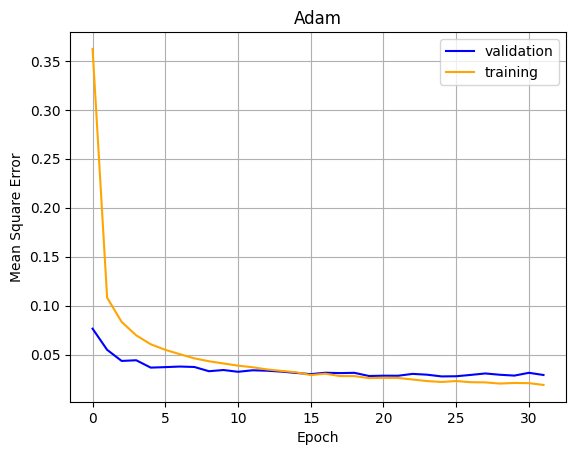

In [14]:
plt.plot(h0.history['val_loss'], color='blue')
plt.plot(h0.history['loss'], color='orange')
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('Adam')
plt.grid()
plt.show()

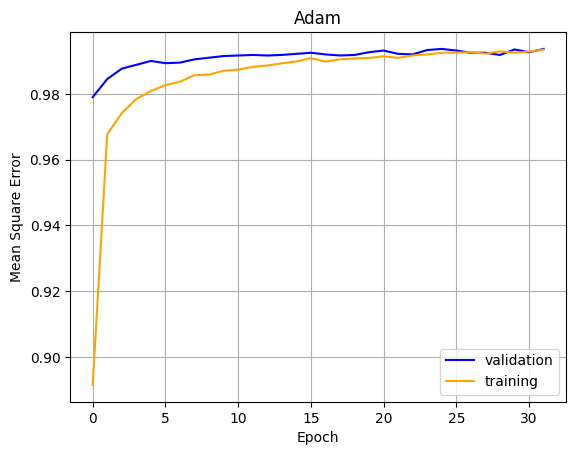

In [15]:
plt.plot(h0.history['val_accuracy'], color='blue')
plt.plot(h0.history['accuracy'], color='orange')
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('Adam')
plt.grid()
plt.show()

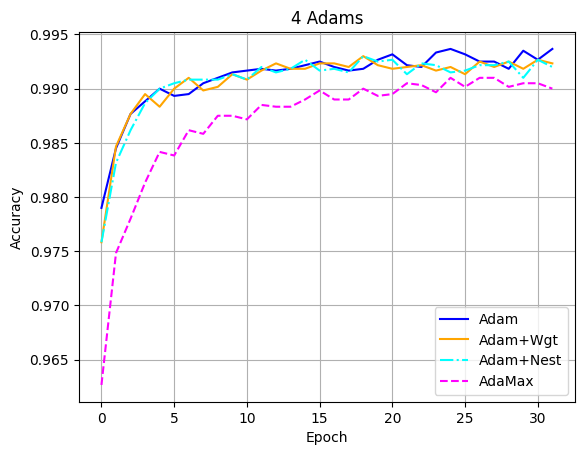

In [16]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h4.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h6.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','Adam+Wgt','Adam+Nest','AdaMax'])
plt.title('4 Adams')
plt.grid()
plt.show()

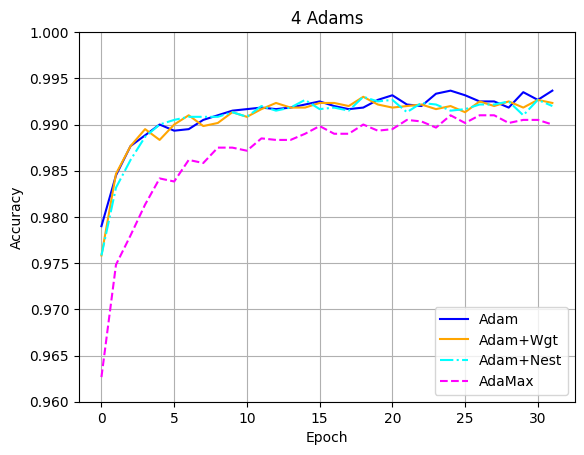

In [17]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h4.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h6.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','Adam+Wgt','Adam+Nest','AdaMax'])
plt.title('4 Adams')
plt.ylim([0.96,1.00])
plt.grid()
plt.show()

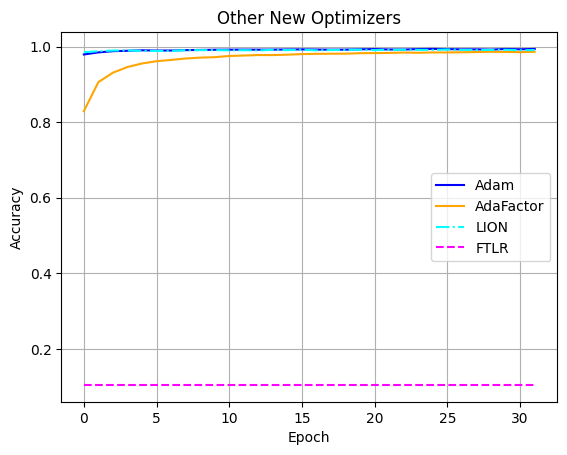

In [18]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h3.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h5.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','AdaFactor','LION','FTLR'])
plt.title('Other New Optimizers')
plt.grid()
plt.show()

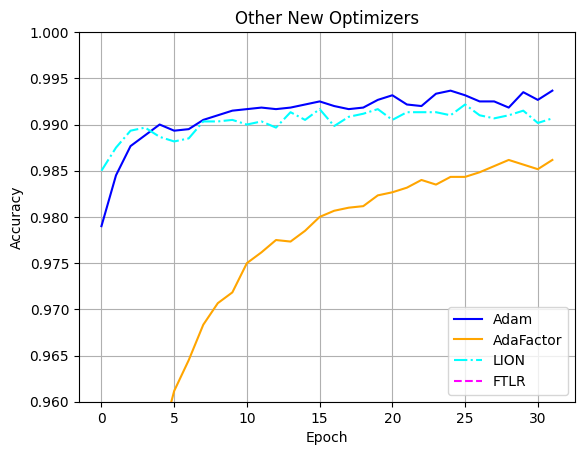

In [19]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h3.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h5.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','AdaFactor','LION','FTLR'])
plt.title('Other New Optimizers')
plt.ylim([0.96,1.00])
plt.grid()
plt.show()

In [20]:
m=model_core(input_shape,num_classes)
m.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)